# A proposal of a unified quantization specification

The purpose of this document is analysing the problem of **quantizers** and deriving a unified specification to describe them.
Although we will start with a mathematical formalisation, our goal is to derive practical descriptions that might be useful in practical engineering contexts.


## Terminology

### Quantization levels, jumps

Let $K > 1$ be a positive integer, called the *number of quantization levels*, or simply the **number of levels**.
Given $K$, we define the **quantization levels** as the elements of the set

\begin{equation*}
    Q := \{ q_{0} < \dots < q_{K-1} \} \subset \mathbb{R} \,.
\end{equation*}

Note that the set is finite, and that its elements are *ordered*.
We call this set a **quantization set** of cardinality $K$.

Given a quantization set $Q$ of cardinality $K$, for each $k = 1, \dots, K-1$ we define the quantity

\begin{equation*}
    j_{k} := q_{k} - q_{k-1}
\end{equation*}

and call it the **jump** between the $(k-1)$-th and the $k$-th quantization levels.
Note that, by definition of quantization set, $j_{k} > 0, \,\forall\, k = 1, \dots, K-1$.
We define the **jumps set** as

\begin{equation*}
    J := \{ j_{1}, \dots, j_{K-1} \} \,.
\end{equation*}

Note that this set is not necessarily ordered, nor the jumps are required to be mutually equal.


### Binning thresholds, gaps

Let $K > 1$ be a number of quantization levels.
We define the **binning thresholds**, or simply, *thresholds*, to be the elements of the set

\begin{equation*}
    T := \{ \theta_{1} < \dots < \theta_{K-1} \} \subset \mathbb{R} \,.
\end{equation*}

Note that also this set is finite, and that its elements are also *ordered*.
We call this set a **binning thresholds set**, or simply *thresholds set*, of cardinality $K-1$.

Similarly to the definition of jumps, given a thresholds set $T$ of cardinality $K-1$, for each $k = 2, \dots, K-1$ we define the quantity

\begin{equation*}
    g_{k} := \theta_{k} - \theta_{k-1}
\end{equation*}

and call it the **gap** between the $(k-1)$-th and the $k$-th thresholds.
Note that, by definition of thresholds set, $g_{k} > 0, \,\forall\, k = 2, \dots, K-1$.
We define the **gaps set** as

\begin{equation*}
    G := \{ g_{2}, \dots, g_{K-1} \} \,.
\end{equation*}

Note that this set is not necessarily ordered, nor the gaps are required to be mutually equal.


## Binning $\mathbb{R}$

Let $K > 1$ be a number of quantization levels, $Q$ be a quantization set of cardinality $K$, $T$ be a thresholds set of cardinality $K-1$.

Due to the ordering property of $T$, the thresholds naturally define a partition of $\mathbb{R}$ into $2K - 1$ subsets.
If (with an abuse of mathematical notation) we define $\theta_{0} := \inf \mathbb{R} = -\infty$ and $\theta_{K} := \sup \mathbb{R} = +\infty$, for each $k = 0, \dots, K-1$ we can define the open interval

\begin{equation*}
    \tilde{I}_{k} := (\theta_{k}, \theta_{k+1}) \,.
\end{equation*}

Moreover, for each $k = 1, \dots, K-1$ let us define $\Theta_{k} = \{ \theta_{k} \}$, i.e., the *singletons* including just the threshold point each.

With this notation, it is straightforward to represent the partition of $\mathbb{R}$ as

\begin{equation*}
    \tilde{P}_{T} = \{ \tilde{I}_{0}, \Theta_{1}, \tilde{I}_{1}, \dots, \tilde{I}_{K-2}, \Theta_{K-1}, \tilde{I}_{K-1} \} \,.
\end{equation*}

Intuitively, each element of $\tilde{P}$ represents a "bin" to which a real value $x \in \mathbb{R}$ can be mapped.

In the semantics of (quantized) deep neural networks we consider the elements $x \in \mathbb{R}$ as "stimuli", and for each stimulus we would like to associate a "response" chosen from the set $Q$.
An intuitive consequence of this semantics is that we want to label stimuli monotonically; i.e., given two stimuli $x_{1}, x_{2} \in \mathbb{R}, x_{1} < x_{2}$ we would like that the responses satisfy $\sigma(x_{1}) \leq \sigma(x_{2})$.

Consequently, we want to label each element in $\tilde{P}$ with an element of the quantization set $Q$.
Since a constant response does not make an interesting system component, we want to use all the elements in $Q$ (remember that $|Q| = K > 1$).
Since we have $K$ quantization levels and $K$ non-singleton intervals, we will assign the response $q_{k}$ to all the stimuli in bin $\tilde{I}_{k}$, for each $k = 0, \dots, K-1$.

Multiple choices can be made for what concerns labelling stimuli $x \in T$ (i.e., inputs that fall precisely on a threshold).
Each threshold is placed exactly in-between two consecutive bins.
Indeed, given $k \in \{ 1, ..., K-1 \}$, by definition of $\tilde{I}_{k}$ it follows that $\forall\, x \in I_{k-1}, \, x < \theta_{k}$; analogously, $\forall\, x \in I_{k}, \, \theta_{k} < x$.
Due to the monotonicity requirement, we can map $\theta_{k}$ either to $q_{k-1}$ or to $q_{k}$.
This reasoning is valid for each threshold, and we therefore have $2^{K-1}$ options to map thresholds into $Q$ in an way that satisfies the monotonicity constraint.
We **must** choose a convention.

An example convention might be to map

\begin{equation*}
    \theta_{k} \mapsto \max \{ q_{k-1}, q_{k} \} = q_{k} \,.
\end{equation*}

This will yield the partition

\begin{equation*}
    P_{T}^{\geq} := \{ I_{0} = \tilde{I}_{0} \} \cup ( \cup_{k = 1}^{K-1} (I_{k} := \tilde{I}_{k} \cup \Theta_{k})) \,.
\end{equation*}

We call this partition the **greater-or-equal partition**.


### Quantizers

We define a **proto-quantizer** to be a function $\sigma$ that satisfies the following properties:

* its domain is $\mathbb{R}$ or a subset of its; i.e., $\mathcal{D}_{\sigma} \subseteq \mathbb{R}$;
* its codomain is a (finite) quantization set $Q \subset \mathbb{R}$; i.e., $\mathcal{C}_{\sigma} = Q \subset \mathbb{R}$;
* it is non-decreasing; i.e., $\forall\, x_{1}, x_{2} \in \mathcal{D}_{\sigma}, x_{1} < x_{2}, \, \sigma(x_{1}) \leq \sigma(x_{2})$;
* it is non-constant; i.e., $\exists\, x_{1}, x_{2} \in \mathcal{D}_{\sigma}, x_{1} \neq x_{2} \,|\, \sigma(x_{1}) \neq \sigma(x_{2})$.

The simplest example of proto-quantizer is the **Heaviside function**:

\begin{align*}
    H \,:\,
    &\mathbb{R} \to \{ 0, \frac{1}{2}, 1 \} \\
    &x \mapsto
    \begin{cases}
        0, \text{if } x < 0, \\
        \frac{1}{2}, \text{if } x = 0, \\
        1, \text{if } x > 0.
    \end{cases}
\end{align*}

Alternative versions of the Heaviside map zero to either zero or one, simplifying the function:

\begin{align*}
    H^{-} \,:\,
    &\mathbb{R} \to \{ 0, 1 \} \\
    &x \mapsto
    \begin{cases}
        0, \text{if } x \leq 0, \\
        1, \text{if } x > 0,
    \end{cases} \\
    H^{+} \,:\,
    &\mathbb{R} \to \{ 0, 1 \} \\
    &x \mapsto
    \begin{cases}
        0, \text{if } x < 0, \\
        1, \text{if } x \geq 0.
    \end{cases}
\end{align*}

In digital arithmetic, $H^{-}$ and $H^{+}$ serve as better models that $H$, since they can be implemented using a single comparison instruction instead of two.

Given a parameter $\theta \in \mathbb{R}$, we define the **generalised Heaviside function** as

\begin{align*}
    H_{\theta} \,:\,
    &\mathbb{R} \to \{ 0, \frac{1}{2}, 1 \} \\
    &x \mapsto H(x - \theta) =
    \begin{cases}
        0, \text{if } x < \theta, \\
        \frac{1}{2}, \text{if } x = \theta, \\
        1, \text{if } x > \theta.
    \end{cases}
\end{align*}

Analogously, we define $H^{-}_{\theta}(x) := H^{-}(x - \theta)$ and $H^{+}_{\theta}(x) := H^{+}(x - \theta)$ for all $x \in \mathbb{R}$.

Let now $K > 1$ be a given number of quantization levels, $Q$ be a quantization set of cardinality $K$, and $T$ be a thresholds set of cardinality $K-1$.
We define a **quantizer** as the function

\begin{align*}
\begin{split}
    \sigma \,:\,
    &\mathbb{R} \to Q \\
    &x \mapsto q_{0} + \sum_{k = 1}^{K-1} j_{k} H^{+}_{\theta}(x) \,.
\end{split}
\end{align*}

We could also express this quantizer as the weighted sum of the indicator functions associated with the greater-or-equal partition $P_{T}^{\geq} = \{ I_{0}, \dots, I_{K-1} \}$:

\begin{align*}
\begin{split}
    \sigma \,:\,
    &\mathbb{R} \to Q \\
    &x \mapsto \sum_{k = 0}^{K-1} q_{k} \chi_{I_{k}}(x) \,.
\end{split}
\end{align*}

When $\mathcal{D}_{\sigma} = \mathbb{R}$, the graph of a quantizer resembles the shape of a stair, and we hence call them also *stair functions*.
In the specific sub-case where $|Q| = 2$, the graph of a quantizer resembles the shape of a stair composed of a single step, and we hence call it a *step function*.


## Constraining the domain

In digital arithmetic applications, the domain of a quantizer can not be the whole set $\mathbb{R}$.
In practice, $\mathcal{D}_{\sigma}$ is a finite subset of $\mathbb{Q} \subset \mathbb{R}$ (in the case of floating-point of fixed-point decimal numbers), a finite subset of $\mathbb{Z} \subset \mathbb{Q} \subset \mathbb{R}$ (in the case of signed integers), or a finite subset of $\mathbb{N}_{0} \subset \mathbb{Z} \subset \mathbb{Q} \subset \mathbb{R}$ (in the case of unsigned integers).


## Decomposing a quantizer

We argue that each quantizer function can be decomposed into three operations:

* **binning**, where the input range is mapped into an integer range (representing abstract bins; we could as well represent this range using a categorical variable);
* **re-indexing**, where an integer range (representing abstract bins) is mapped to another integer range (representing numbers that can be used by hardware logic, such as integer multipliers or bit-shift values); an example of a case where it's needed is provided by the case of asymmetric uniform linear quantization, where we want to represent an "uncommon" range of bins (e.g., -27 to 123);
* **de-integerization**, where an integer range (representing numbers that can be used by hardware logic) is mapped to the output range; such mapping can be the identity (this is the case of true-quantized networks) or involve some embedding into the floating-point domain (e.g., when multiplying the integer value by the *output quantum* or expanding a bit-shift into a power-of-two multiplier).

From the hardware perspective, some or all of these operations are usually handled implicitely, so this might seem as an hopeless or unuseful (and hence unnecessary) task.
But remember that the goal of this document is looking for a general specification that can simplify graph rewriting and compilation.

*Therefore, we will try to define a way in which all hardware quantisation operations can be mapped back to this formalisation, and viceversa.*


### Considerations

Many algorithms perform the binning step on parameters at training time, but note that it is **not** mandatory to perform it at inference time.
In fact, since parameters won't change once the network is deployed, this step should be executed only once (after training, during the code generation step).

Instead, the binning step must **always** be performed on features at runtime.
In fact, since features can change once the network is deployed, this step will have to be executed once per inference.

Performing the binning in a threshold-based manner is very general but usually inefficient from an application perspective.

Most algorithms proposed in the literature tackle this problem by an efficient use of hardware-friendly operations such as:

* flooring/ceiling/rounding (on floating-point numbers) and bit-shifts (on integer numbers) to truncate the fractional parts of numbers,
* clipping to limit the domain and/or the codomain of a quantizer (recall that this operation is based on the max/min operations, which are ultimately based on comparisons).


In [1]:
import numpy as np
from typing import Union, Tuple


# generate input array
xmin = -5.0
xmax = 8.0
N    = 10000
x    = np.linspace(xmin, xmax, N)


def show_quantization(
    x:            np.array, 
    x_binned:     Union[np.array, None],
    x_int:        Union[np.array, None],
    z:            np.array,
    fraction:     float = 0.1,
    random_start: bool = False):

    period = np.floor(len(x) * fraction).astype(dtype=np.int64)  # show just one item over `period`

    if random_start:
        s = np.random.randint(0, period)
    else:
        s = 0

    e = len(x)
    
    str_out = "Original: {:8.3f} - Bin ID: {:4d} - Encoding: {:4d} - De-integerised: {:8.3f}"
    for i in range(s, e, period):
        print(str_out.format(x[i], x_binned[i], x_int[i].astype(np.int64), z[i]))


## Threshold-based quantization

Originally, the *additive noise annealing* (ANA) quantization algorithm was meant to use uniform output ranges (i.e., the jumps between consecutive quantization levels are mutually equal) and possibly non-uniformly-spaced binning thresholds (i.e., the gaps between two consecutive thresholds could be distinct).
In this case, the binning step must be performed using a look-up table (i.e., comparison-based) approach.

We can refer to this type of quantization algorithms as *non-uniform binning, uniform de-integerisation*.


In [2]:
nlevels = 8


def generate_thresholds(
    nlevels: int,
    tmin:    float = -1.0,
    tmax:    float = 1.0) -> np.array:

    assert tmin < tmax

    nthres = nlevels - 1
    thres  = (tmax - tmin) * np.random.rand(nlevels - 1) + tmin
    thres  = np.sort(thres)
    
    return thres


# thresholds and binning
thres     = generate_thresholds(nlevels, tmin=-3.0, tmax=3.0)
thres_ext = np.concatenate((np.array([-np.inf]), thres, np.array([np.inf])), axis=0)

bin_preimages = [(s, e) for s, e in zip(thres_ext[:-1], thres_ext[1:])]
bin_ids       = np.arange(0, len(bin_preimages))

bin2preimage = {bin_id: preimage for bin_id, preimage in zip(bin_ids, bin_preimages)}
bin2thres    = {bin_id: t for bin_id, t in zip(bin_ids[1:], thres)}


# re-indexing
zero      = -4
encodings = np.arange(zero, zero + nlevels)

bin2enc = {bin_id: enc for bin_id, enc in zip(bin_ids, encodings)}


# de-integerisation
quantum_out = 0.1
offset_out  = 2.3


def binning(
    x:            np.array,
    bin2preimage: dict,
    bin2thres:    dict) -> np.array:
    
    x_binned = np.zeros_like(x, dtype=np.int64)
    
    for bin_id, (s, e) in bin2preimage.items():
        x_in_bin = np.logical_and(s < x, x < e)
        x_binned[x_in_bin] = bin_id
        
    for bin_id, t in bin2thres.items():
        x_binned[x == t] = bin_id
        
    return x_binned


def reindexing(
    x_binned: np.array,
    bin2enc:  dict) -> np.array:
    
    x_int = np.array(list(map(lambda x: bin2enc[x], x_binned)))
    
    return x_int


def deintegerisation(
    x_int:       np.array,
    quantum_out: float,
    offset_out:  float) -> np.array:
    
    return x_int * quantum_out + offset_out


x_binned = binning(x, bin2preimage, bin2thres)
x_int    = reindexing(x_binned, bin2enc)
z        = deintegerisation(x_int, quantum_out, offset_out)


For performance reasons, the binning step can fused with the re-indexing step.
This can be easily implemented by storing the integer encoding value (which as an arithmetic semantic) into the look-up table, without the need of an extra indirection level.

This is an implicit but ubiquitous practice in most quantization algorithms.
It derives from the fact that in most quantization algorithms the bins are consecutive intervals defining a partition of $\mathbb{R}$.
Therefore, it is possible to number them using a sequence of successive integers.
Moreover, since most algorithms assume that the quantization levels are associated to bins in a monotonic fashion, the re-indexing operation can be somehow straightforwardly composed with the binning.

Note, though, that this assumption might not hold for more general quantizers!


In [3]:
# build look-up table
thres2enc = {t: bin2enc[bin_id] for bin_id, t in bin2thres.items()}


def fused_binning_reindexing(
    x:         np.array,
    enc_0:     int,
    thres2enc: dict) -> np.array:
    
    # I assume that the integer encodings are perfectly correlated with thresholds;
    # i.e., if (t1, e1) and (t2, e2) are items of the LUT, then t1 < t2 -> e1 < e2
    
    x_int = np.full(x.shape, enc_0)
    
    for t, enc in thres2enc.items():
        x_int[t <= x] = enc
    
    return x_int


fused_x_int = fused_binning_reindexing(x, encodings[0], thres2enc)
fused_z     = deintegerisation(fused_x_int, quantum_out, offset_out)

assert np.all(fused_x_int == x_int)
assert np.all(fused_z     == z)


## Logarithmic quantization

As an example quantization algorithm using logarithmic binning and logarithmic de-integerisation, we consider the *incremental network quantization* (INQ) algorithm.


In [4]:
# binning parameters
offset_in  = 0.0
stretch_in = 1.0
base_in    = 2.0

nmin = -2
nmax = 2
pmin = -3
pmax = 3


# thresholds and binning
nrange = np.arange(nmin, nmax + 1)
nthres = offset_in - ((base_in + 1) / 2) * stretch_in * (np.exp2(nrange - 1) ** np.log2(base_in))
nthres = np.sort(nthres)  # sort thresholds in ascending order

prange = np.arange(pmin, pmax + 1)
pthres = offset_in + ((base_in + 1) / 2) * stretch_in * (np.exp2(prange - 1) ** np.log2(base_in))
pthres = np.sort(pthres)  # sort thresholds in ascending order

thres     = np.concatenate((nthres, pthres), axis=0)
thres_exp = np.concatenate((np.array([-np.inf]), thres, np.array([np.inf])), axis=0)

bin_preimages = [(s, e) for s, e in zip(thres_exp[:-1], thres_exp[1:])]
bin_ids       = np.arange(0, len(bin_preimages))  # abstract categorical identifiers (I use integers, but I could as well use strings from a generic alphabet)
bin2preimage  = {bin_id: preimage for bin_id, preimage in zip(bin_ids, bin_preimages)}

bin2nthres    = {bin_id: t for bin_id, t in zip(bin_ids[:len(nthres)],  nthres)}
bin2pthres    = {bin_id: t for bin_id, t in zip(bin_ids[-len(pthres):], pthres)}
thres2bin     = {**bin2nthres, **bin2pthres}


# re-indexing
sign      = np.concatenate((-np.ones(len(nrange)), np.zeros(1), np.ones(len(prange))), axis=0)
shift     = np.concatenate((nrange[::-1], np.array([-np.inf]), prange), axis=0)
encodings = list(zip(sign, shift))

bin2enc = {b: (sg, sh) for b, (sg, sh) in zip(bin_ids, encodings)}


# de-integerisation parameters
base_out    = 2.0
stretch_out = 1.0
offset_out  = 0.0

# quantization levels
nqlevels = offset_out - stretch_out * (np.exp2(nrange) ** np.log2(base_out))
pqlevels = offset_out + stretch_out * (np.exp2(prange) ** np.log2(base_out))

qlevels = np.concatenate((nqlevels, np.zeros(1), pqlevels), axis=0)
qlevels = np.sort(qlevels)

def binning(
    x:            np.array,
    bin2preimage: dict,
    bin2thres:    dict) -> np.array:

    x_binned = np.zeros_like(x, dtype=np.int64)
    
    for bin_id, (s, e) in bin2preimage.items():
        x_in_bin = np.logical_and(s < x, x < e)
        x_binned[x_in_bin] = bin_id
    
    for bin_id, t in bin2thres.items():
        x_binned[x == t] = bin_id
        
    return x_binned


def reindexing(
    x_binned: np.array,
    bin2enc:  dict) -> Tuple[np.array, np.array]:
    
    sign  = np.array(list(map(lambda x: bin2enc[x][0], x_binned)))
    shift = np.array(list(map(lambda x: bin2enc[x][1], x_binned)))
    
    return sign, shift


def deintegerization(
    sign:        np.array,
    shift:       np.array,
    base_out:    float,
    stretch_out: float,
    offset_out:  float) -> np.array:
    
    level = sign * np.exp2(shift) ** np.log2(base_out)
    
    return level * stretch_out + offset_out


x_binned    = binning(x, bin2preimage, bin2thres)
sign, shift = reindexing(x_binned, bin2enc)
z           = deintegerization(sign, shift, base_out, stretch_out, offset_out)


For efficiency reasons, the binning and re-indexing steps are fused together.


In [5]:
def fused_binning_reindexing(
    x:          np.array,
    offset_in:  float,
    stretch_in: float,
    base_in:    float,
    nmin:       int,
    nmax:       int,
    pmin:       int,
    pmax:       int) -> Tuple[np.array, np.array]:
    
    assert 0 < stretch_in  # scale factor must be positive
    assert 0 < base_in     # representation base must be positive
    
    assert nmin < nmax
    assert pmin < pmax
    
    x_centered = x - offset_in
    x_scaled   = x_centered / stretch_in

    sign = np.sign(x_centered)
    
    factor = (base_in + 1) / 2
    shift  = np.floor(np.log2(x_scaled * sign / factor) / np.log2(base_in)) + 1.0
    
    shift_negative = shift[sign < 0]
    shift_positive = shift[sign >= 0]
    
    shift[sign < 0]  = np.where(shift_negative < nmin, np.full(shift_negative.shape, -np.inf), np.clip(shift_negative, nmin, nmax))
    shift[sign >= 0] = np.where(shift_positive < pmin, np.full(shift_positive.shape, -np.inf), np.clip(shift_positive, pmin, pmax))
    
    sign[shift == -np.inf] = 0.0
    
    return sign, shift


fused_sign, fused_shift = fused_binning_reindexing(x, offset_in, stretch_in, base_in, nmin, nmax, pmin, pmax)
fused_z                 = deintegerization(sign, shift, base_out, stretch_out, offset_out)


assert np.all(fused_sign  == sign)
assert np.all(fused_shift == shift)
assert np.all(fused_z     == z)


We should also specify that the INQ algorithm does not leave as many degree of freedoms as we did in the code above.
The specific assumptions of the algorithm are the following:

* $\mathtt{nmin} = \mathtt{pmin}$;
* $\mathtt{nmax} = \mathtt{pmax}$;
* the total number of levels, $(\mathtt{pmax} - \mathtt{pmin} + 1) + (\mathtt{pmax} - \mathtt{pmin} + 1) + 1$ is equal to $2^{B} - 1$ for some $B \in \mathbb{N}, B > 1$;
* $\mathtt{offset\_in} = \mathtt{offset\_out} = 0$;
* $\mathtt{stretch\_in} = \mathtt{stretch\_out} = 0$;
* $\mathtt{base\_in} = \mathtt{base\_out} = 2$.


## Uniform quantization (AKA linear quantization)

Linear binning and linear de-integerisation are used by many quantization algorithms.
Example algorithms include the *straight-through estimator* (STE), *parametrized activation clipping* (PACT), and *statistics-aware weight binning* (SAWB).


In [6]:
# quantization parameters (word-size specification)
use_wordsize_nlevels = False

if use_wordsize_nlevels:
    nbits   = 8
    nlevels = 2 ** B
else:
    nbits_max = 8
    nlevels   = np.random.randint(2, 2 ** nbits_max + 1)  # in applications, the designer would choose how many levels to use


# the bins are computed on tensor statistics
use_symmetric_encoding = False

if use_symmetric_encoding:

    span = 2 * np.max(np.abs(x))

    quantum_in = span / (nlevels - 1) if (nlevels % 2 == 1) else span / (nlevels - 2)
    zero       = - (nlevels - 1) / 2 if (nlevels % 2 == 1) else - ((nlevels - 2) / 2 + 1)

else:

    xmin = np.min(x)
    xmax = np.max(x)
    span = np.max(x) - np.min(x)

    quantum_in = span / (nlevels - 1)
    zero      = np.floor(xmin / quantum_in)

# thresholds and binning
thres     = quantum_in * (zero + np.arange(1, nlevels))
thres     = np.sort(thres)
thres_ext = np.concatenate((np.array([-np.inf]), thres, np.array([np.inf])), axis=0)

bin_preimages = [(s, e) for s, e in zip(thres_ext[:-1], thres_ext[1:])]
bin_ids       = np.arange(0, len(bin_preimages))
bin2preimage  = {bin_id: preimage for bin_id, preimage in zip(bin_ids, bin_preimages)}
bin2thres     = {bin_id: t for bin_id, t in zip(bin_ids[1:], thres)}


# re-indexing
encodings = np.array([bin_id + zero for bin_id in bin_ids])
bin2enc   = {bin_id: enc for bin_id, enc in zip(bin_ids, encodings)}


# de-integerisation parameters
quantum_out = quantum_in
qlevels     = encodings * quantum_out


def binning(
    x:            np.array,
    bin2preimage: dict,
    bin2thres:    dict) -> np.array:
    
    x_binned = np.zeros_like(x, dtype=np.int64)
    
    for bin_id, (s, e) in bin2preimage.items():
        x_in_bin = np.logical_and(s < x, x < e)
        x_binned[x_in_bin] = bin_id
    
    for bin_id, t in bin2thres.items():
        x_binned[x == t] = bin_id
        
    return x_binned


def reindexing(
    x_binned: np.array,
    bin2enc:  dict) -> np.array:
    
    x_int = np.array(list(map(lambda x: bin2enc[x], x_binned)))

    return x_int
    

def deintegerisation(
    x_int:       np.array,
    quantum_out: float,
    offset_out:  float) -> np.array:
    
    return x_int * quantum_out + offset_out


x_binned = binning(x, bin2preimage, thres2bin)
x_int    = reindexing(x_binned, bin2enc)
z        = deintegerisation(x_int, quantum_out, offset_out)


Again, for performance reason the binning and re-indexing operations are usually fused.


In [7]:
def fused_binning_reindexing(
    x:          np.array,
    quantum_in: float,
    zero:       int,
    nlevels:    int) -> np.array:
    
    x_int = np.clip(np.floor(x / quantum_in), zero, zero + nlevels - 1)
    
    return x_int

fused_x_int = fused_binning_reindexing(x, quantum_in, zero, nlevels)
fused_z     = deintegerisation(fused_x_int, quantum_out, offset_out)

assert np.all(fused_x_int == x_int)
assert np.all(fused_z     == z)


A standard assumption of many algorithms that use linear quantization is to set $\mathtt{quantum\_in} = \mathtt{quantum\_out}$.
This assumption comes from the semantic interpretation of the quantizer as an approximator of a continuous function.


## Non-uniform quantization

Some algorithms use non-uniformly sized gaps (i.e., the distances between two consecutive thresholds are not mutually equal) and non-uniformly spaced output values (i.e., the jumps between two consecutive quantization levels are not mutually equal).

Usually, these algorithms compute the binning looking at the uni-variate distribution of the components of the array that they are meant to quantize.


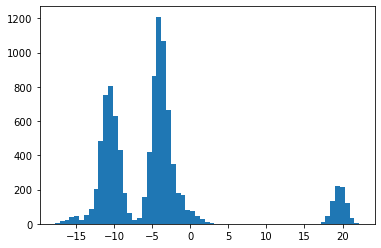

In [8]:
from scipy.stats import truncnorm
import matplotlib.pyplot as plt


def sample_from_univariate_gaussian_mixture(
    ncomponents: int,
    N: int,
    minmi: float = -1.0,
    maxmi: float = -1.0,
    sigma_random_dilation_factor: float = 0.1) -> np.array:

    # generate means
    mis = (maxmi - minmi) * truncnorm.rvs(minmi, maxmi, size=ncomponents)
    mis = np.sort(mis)

    # generate standard deviations
    sigmas = np.ones((ncomponents,)) + 0.2 * (2.0 * np.random.rand(ncomponents) - 1.0)

    # generate component weights by partitioning the interval [0, 1)
    _MAX = 100000
    ps = np.sort((1 + np.random.permutation(_MAX - 1))[:ncomponents-1] / _MAX)
    ps = np.concatenate((np.zeros((1,)), ps), axis=0)

    # from which mixture component should each array component be drawn?
    x_ps   = np.random.rand(N)
    x_comp = np.zeros((N,), dtype=np.int64)
    for i, p in enumerate(ps):
        x_comp[x_ps > p] = i

    # generate the array
    x    = np.zeros((N,))
    seed = np.random.randint(0, 1000)
    rng  = np.random.RandomState(seed)
    for i in range(0, nlevels):
        x[x_comp == i] = rng.normal(loc=mis[i], scale=sigmas[i], size=N)[x_comp == i]
        
    return x


nlevels = 8
x = sample_from_univariate_gaussian_mixture(nlevels, N, minmi=-5.0, maxmi=7.0, sigma_random_dilation_factor=0.2)

_ = plt.hist(x, bins='auto')
plt.show()


In [9]:
from sklearn.cluster import KMeans


# generate the thresholds based on the statistics of the uni-variate distribution of the array
kmeans = KMeans(n_clusters=nlevels)
kmeans.fit(x.reshape(-1, 1))


# thresholds and binning
centroids = np.sort(kmeans.cluster_centers_.squeeze())
thres     = (centroids[:-1] + centroids[1:]) / 2
thres_ext = np.concatenate((np.array([-np.inf]), thres, np.array([np.inf])))

bin_preimages = [(s, e) for s, e in zip(thres_ext[:-1], thres_ext[1:])]
bin_ids       = np.arange(0, len(bin_preimages))
bin2preimage  = {bin_id: preimage for bin_id, preimage in zip(bin_ids, bin_preimages)}
bin2thres     = {bin_id: t for bin_id, t in zip(bin_ids[1:], thres)}


# re-indexing
bin2enc = {bin_id: bin_id for bin_id in bin_ids}  # it is the identity


# de-integerisation
outputs = centroids
enc2out = {bin_id: out for bin_id, out in zip(bin_ids, outputs)}


def binning(
    x:            np.array,
    bin2preimage: dict,
    bin2thres:    dict) -> np.array:
    
    x_binned = np.zeros_like(x, dtype=np.int64)
    
    for bin_id, (s, e) in bin2preimage.items():
        x_in_bin = np.logical_and(s < x, x < e)
        x_binned[x_in_bin] = bin_id
        
    for bin_id, t in bin2thres.items():
        x_binned[x == t] = bin_id
        
    return x_binned


def reindexing(
    x_binned: np.array,
    bin2enc:  dict) -> np.array:

    x_int = np.array(list(map(lambda x: bin2enc[x], x_binned)))

    return x_int


def deintegerisation(
    x_int:   np.array,
    enc2out: dict) -> np.array:
    
    z = np.array(list(map(lambda x: enc2out[x], x_int)))
    
    return z


x_binned = binning(x, bin2preimage, thres2bin)
x_int    = reindexing(x_binned, bin2enc)
z        = deintegerisation(x_int, enc2out)


In these cases, the mapping from the binning range to the integer (i.e., encoding) range is usually the identity.
In fact, the outputs are non-uniformly-spaced values that have no arithmetic relationship with the encodings (as happened for logarithmic and linear de-integerisation).


In [10]:
# build look-up table
thres2enc = {t: bin2enc[bin_id] for bin_id, t in bin2thres.items()}


def fused_binning_reindexing(
    x:         np.array,
    enc0:      int,
    thres2enc: dict) -> np.array:

    # this function works under the assumption that the bins are identified by increasing integers
    x_int = np.full(x.shape, enc0)
    for t, enc in thres2enc.items():
        x_int[t <= x] = enc

    return x_int

fused_x_int = fused_binning_reindexing(x, encodings[0], bin2thres)
fused_z     = deintegerisation(x_binned, enc2out)

assert np.all(z == fused_z)


Non-uniform quantization schemes are the one that benefit the most from *compression algorithms*.
For example, a statistical analysis on the distribution of the encodings of an array components can be used to apply Huffman coding to optimise storage savings.

Therefore, we also think that it is possible to expand the three-step decomposition outlined above by adding two steps in-between re-indexing and de-integerisation:

* **storage-oriented encoding**, going from the encoding range to an optimal storage-oriented encoding range (a set whose items are bit-strings);
* **storage-oriented decoding**, going from the storage-oriented decoding range back to the encoding range.

Of course, teh storage-oriented encoding function must be invertible, its inverse being the storage-oriented decoding function.


## Concluding remarks

Analysing the four examples above, it seems that the proposed quantization algorithm use three strategies for optimising the binning step:

* threshold-based/look-up table (LUT): $k$-means, ANA;
* flooring: STE, PACT, SAWB;
* logarithmic (most-significant bit, MSB): INQ.

Similarly, we can identify three analogous strategies to perform the de-integerisation step:

* look-up table (LUT): $k$-means;
* linear scaling: STE, PACT, SAWB, ANA;
* exponentiation: INQ.

Based on this discussion, it seems reasonable to propose a format of specification of quantization algorithms such that:

* its algorithmic implementation uses the operations that the programmer thinks are the most efficient to implement the desired behaviour;
* its documentation maps the "compact" implementation into the described theoretical format, breaking down the implementation into its composing steps and exposing which of them have been "fused";
* the PyTorch modules implementing the quantization algorithm must explicitly encode two pieces of information that will represent the annotation that is to be consumed by graph manipulation and code generation tools:

  * the **semantics of the encodings** (are they to be used as bit-shifts, integer multipliers, or simply keys in a look-up table?);
  * a **flag indicating whether the de-integerisation operation should be performed or not** (i.e., the encodings will be used "as-they-are").
